In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError,BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

In [2]:
#taking the training examples
X_train=np.array([[1.0],[2.0]],dtype=np.float32)
Y_train=np.array([[300.0],[500.0]],dtype=np.float32)
    

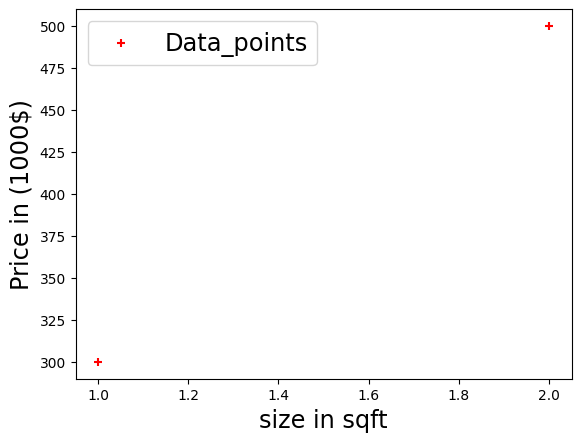

In [3]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1) #creating figure and axes
ax.scatter(X_train,Y_train,color='r',marker='+',label='Data_points')
ax.legend(fontsize='xx-large')
ax.set_ylabel('Price in (1000$)',fontsize='xx-large')
ax.set_xlabel('size in sqft',fontsize='xx-large')
plt.show()

### We will be implementing this using linear regression ###

In [4]:
linear_layers=tf.keras.layers.Dense(units=1,activation='linear')

In [5]:
#getting the weights
a1=linear_layers(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[-0.22755122]], shape=(1, 1), dtype=float32)


In [6]:
w,b=linear_layers.get_weights()
print(f"w={w},b={b}")

w=[[-0.22755122]],b=[0.]


In [7]:
#now we will consider some weights and compare with the equation 1
set_w=np.array([[200]])
set_b=np.array([100])
linear_layers.set_weights([set_w,set_b])
print(linear_layers.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [8]:
a1=linear_layers(X_train[0].reshape(1,1))
print(a1)
alin=np.dot(set_w,X_train[0].reshape(1,1))+set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [9]:
prediction_tf=linear_layers(X_train)
prediction_np=np.dot(X_train,set_w)+set_b

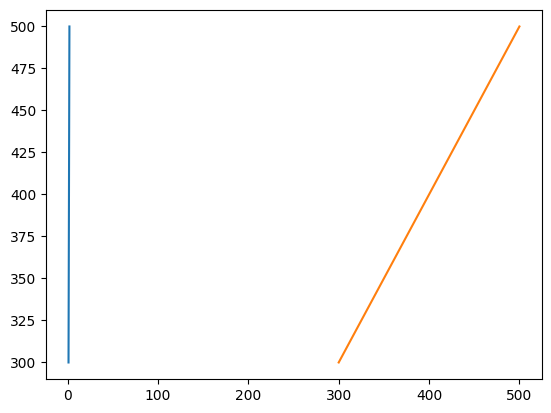

In [10]:
plt.plot(X_train, Y_train, prediction_tf, prediction_np)

### Now we will do with sigmoid activation fucntion ###

In [11]:
X_train=np.array([0.,1,2,3,4,5],dtype=np.float32).reshape(-1,1) #2-D array
Y_train=np.array([0,0,0,1,1,1],dtype=np.float32).reshape(-1,1)  #2-D array

In [12]:
pos=Y_train==1
neg=Y_train==0
X_train[pos]

array([3., 4., 5.], dtype=float32)

### Logisitc neuron ###

In [13]:
model=Sequential(
    [tf.keras.layers.Dense(1,input_dim=1,activation='sigmoid',name='L1')]
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [15]:
logistic_layer=model.get_layer('L1')
w,b=logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[0.43179405]] [0.]
(1, 1) (1,)


In [16]:
#lets set some weight values to know weight and bias
set_w=np.array([[2]])
set_b=np.array([-4.5])
logistic_layer.set_weights([set_w,set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [17]:
a1=model.predict(X_train[0].reshape(1,1))
a1

1/1 [==============================] - 0s 197ms/step


array([[0.01098694]], dtype=float32)

In [18]:
def sig(x):
    return tf.math.sigmoid(x)

In [19]:
x=tf.constant(np.dot(X_train[0],set_w).reshape(1,1))+set_b
alog=sig(x).numpy()
print(alog)

[[0.01098694]]


both shows the same value